In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tables

In [2]:
h5file = tables.open_file('data/test.h5', 'r')
print(h5file)

data/test.h5 (File) ''
Last modif.: 'Wed Feb  5 12:42:59 2020'
Object Tree: 
/ (RootGroup) ''
/spectra (Table(16000,), shuffle, blosc(9)) ''



In [3]:
spectra = h5file.get_node('/spectra')[:]['spectrum']

In [5]:
np.save('test', spectra)

In [6]:
np.savez_compressed('test', spectra=spectra)

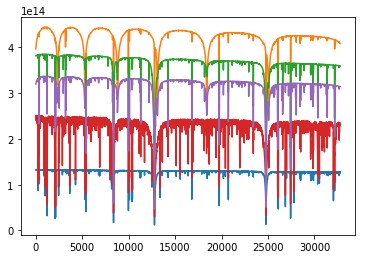

In [7]:
for spectrum in spectra[:5]:
    plt.plot(spectrum)

In [8]:
normalized_spectra = spectra / np.max(spectra, axis=1)[:, np.newaxis]

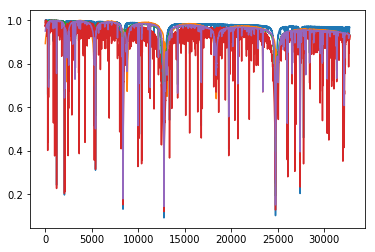

In [9]:
for spectrum in normalized_spectra[:5]:
    plt.plot(spectrum)

In [10]:
wavelengths = np.linspace(500e-10, 5.5e-6, len(normalized_spectra[22]))

Text(0, 0.5, 'normalized intensity')

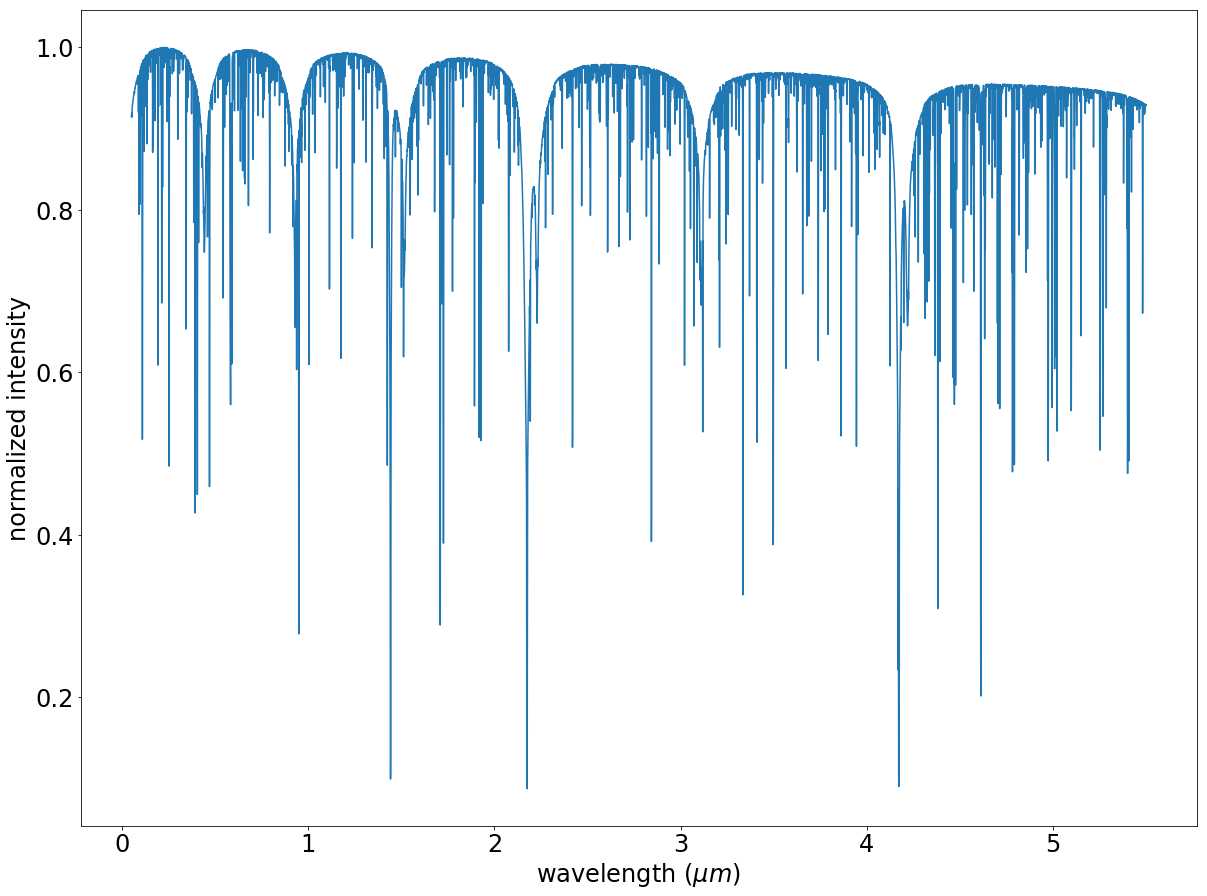

In [11]:
#plt.figure(dpi=300, figsize=(20, 15))
plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 24})
plt.plot(wavelengths*1e6, normalized_spectra[22])
#plt.plot(normalized_spectra[23])
plt.xlabel('wavelength ($\mu m$)')
plt.ylabel('normalized intensity')

(12000, 14000)

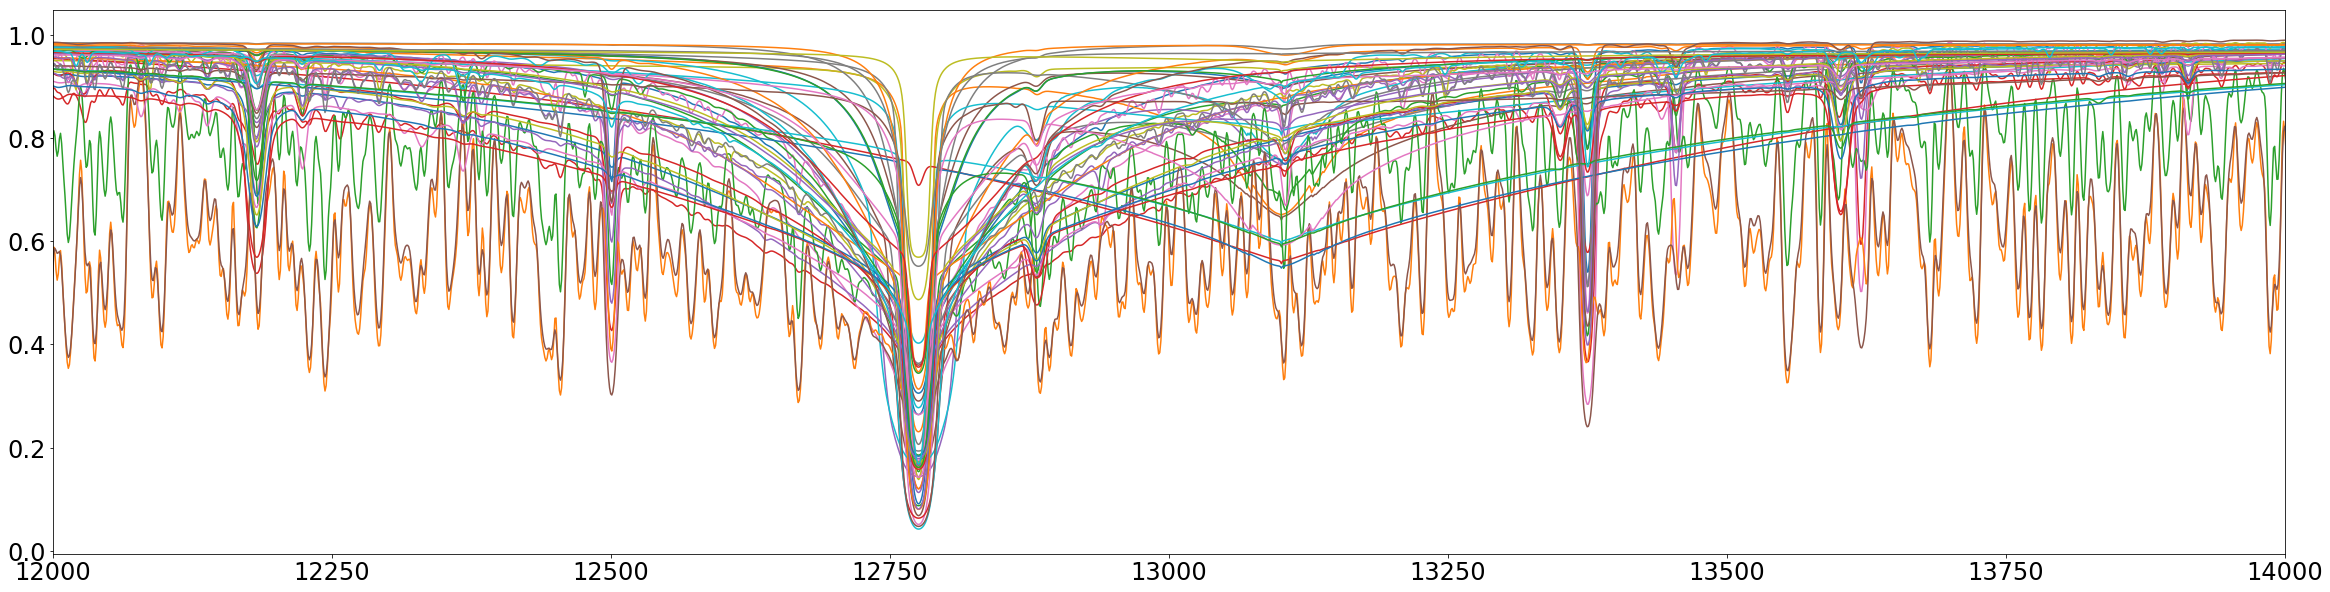

In [13]:
start, stop = 0, -1#700000, 700000+2**15
plt.figure(figsize=(40,10))
for spectrum in normalized_spectra[:50]:
    plt.plot(spectrum[start:stop])
plt.xlim(12000, 14000)

In [104]:
normalized_spectra = np.array([spectrum / np.max(spectrum) for spectrum in spectra])
#TODO: use np

In [123]:
normalized_spectra = spectra / np.max(spectra, axis=1)[:, np.newaxis]

In [127]:
Y = np.matmul(normalized_spectra, normalized_spectra.T)

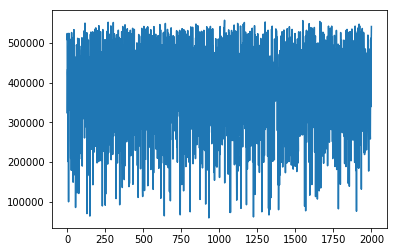

In [128]:
plt.plot(Y[0])

In [129]:
u, s, vh = np.linalg.svd(Y)
print(s)

[6.3321082e+08 9.0849704e+07 1.0821818e+07 ... 2.7719192e-02 2.2843553e-02
 9.6507510e-03]


Text(0, 0.5, 'squared singular value (normalized by largest)')

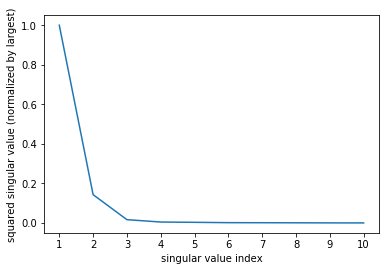

In [130]:
plt.plot(range(1, 11), s[:10] / s[0])
plt.xlabel("singular value index")
plt.xticks(range(1, 11))
plt.ylabel("squared singular value (normalized by largest)")

Text(0, 0.5, 'singular value (normalized by largest)')

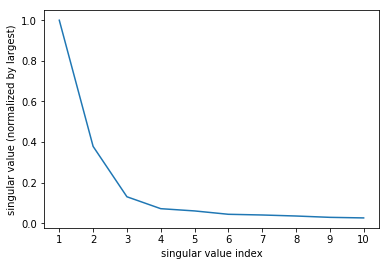

In [131]:
plt.plot(range(1, 11), np.sqrt(s[:10]) / np.sqrt(s[0]))
plt.xlabel("singular value index")
plt.xticks(range(1, 11))
plt.ylabel("singular value (normalized by largest)")

In [39]:
from datetime import datetime
import tables
import matplotlib.pyplot as plt

In [31]:
file = np.load('output/output-190910-154018.npz')
ws = file['ws']
bs = file['bs']

In [42]:
h5file = tables.open_file('data/sample_8k.h5', 'r')
h5node = h5file.get_node('/spectra')

spectra = h5node[:100]['spectrum']
normalized_spectra = spectra / np.max(spectra, axis=1)[:, np.newaxis]

h5file.close()

In [32]:
def recreate_spectra(spectrum, ws, bs):
    NUM_FEATURES = 40
    s = np.copy(spectrum)
    i = 0
    while i < len(ws):
        #print(i, ws[i].shape, s.shape)
        if (np.size(ws[i], 0) != np.size(s, 0)): # check if we're at the sampling step and sample
            s = np.random.normal(s[:NUM_FEATURES], s[NUM_FEATURES:], (NUM_FEATURES,))
        else:
            s = np.clip(ws[i].T @ s + bs[i], 0, None)
            i = i + 1
    return s

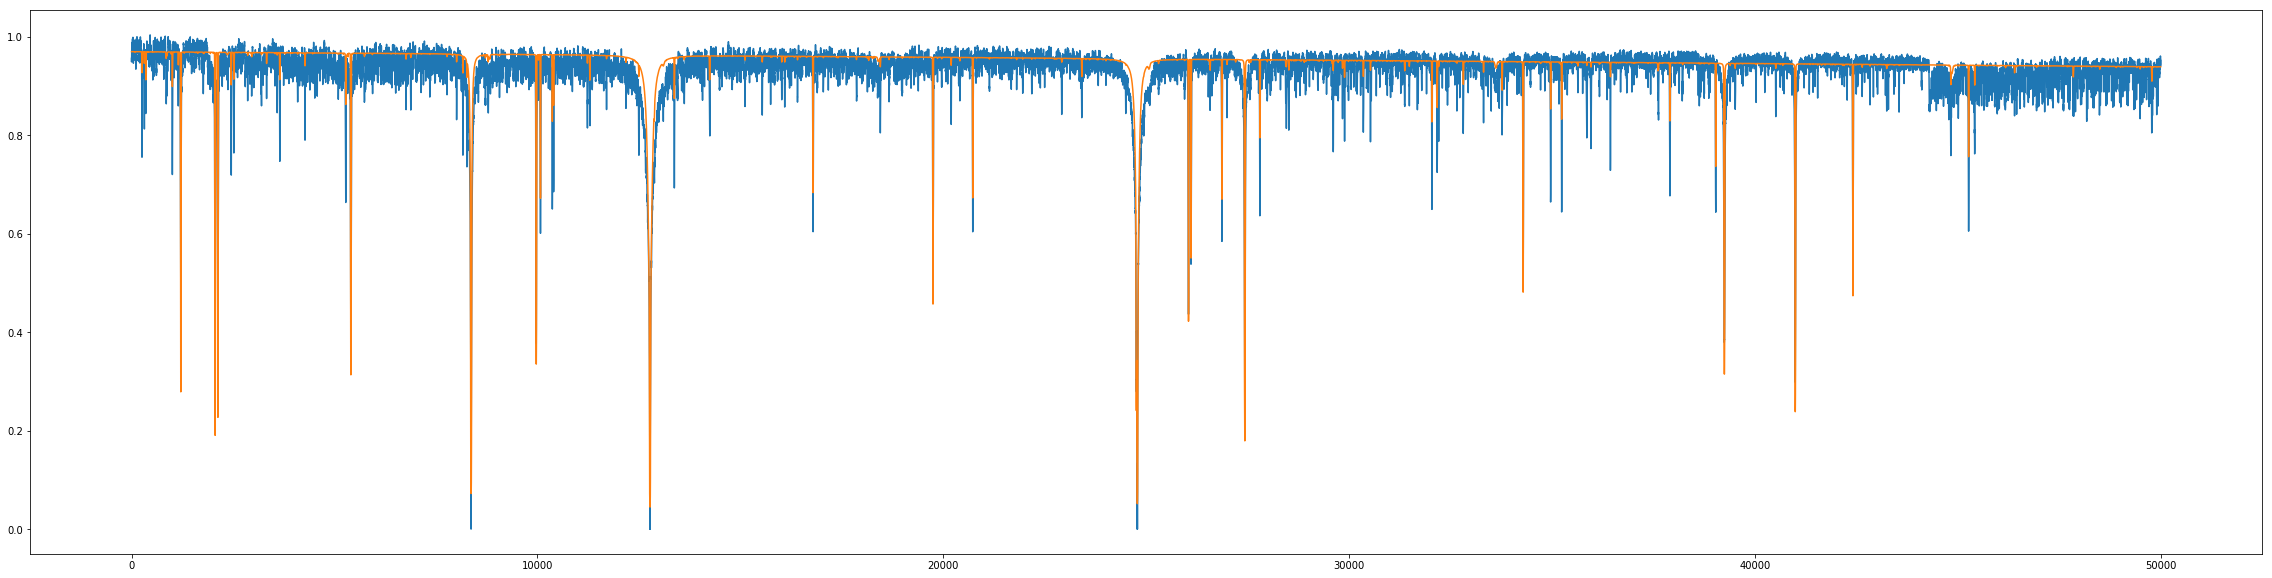

In [36]:
INDEX = 1
recreation = recreate_spectra(normalized_spectra[INDEX][700000:750000], ws, bs)
#left, right = [int(i * SPECTRA_FEATURES) for i in (0, 1)]
left, right = 700000, 750000
plt.figure(figsize=(40,10))
plt.plot(recreation)
plt.plot(normalized_spectra[INDEX][700000:750000])

In [46]:
h5file = tables.open_file('data/sample_8k.h5', 'r')
h5node = h5file.get_node('/spectra')

In [55]:
log_gs = h5node[:2000]["log_g"]
T_effs = h5node[:2000]["T_eff"]

In [106]:
%time data = [(x['log_g'], x['T_eff']) for x in h5node.iterrows()]

CPU times: user 1min 24s, sys: 27.2 s, total: 1min 51s
Wall time: 2min 32s


In [107]:
log_gs = np.array(data)[:, 0]
T_effs = np.array(data)[:, 1]

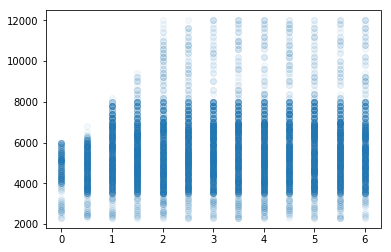

In [108]:
plt.scatter(log_gs, T_effs, alpha=.05)

(array([ 664.,  608.,  655.,  670.,  670., 1354.,  721.,  653.,  710.,
        1295.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

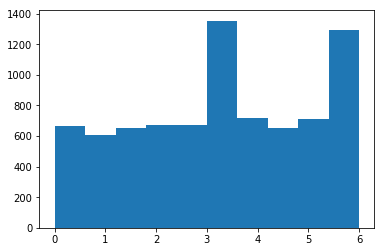

In [109]:
plt.hist(log_gs)

(array([ 339., 1408., 1917., 1650., 1455.,  781.,  123.,  105.,  115.,
         107.]),
 array([ 2300.,  3270.,  4240.,  5210.,  6180.,  7150.,  8120.,  9090.,
        10060., 11030., 12000.]),
 <a list of 10 Patch objects>)

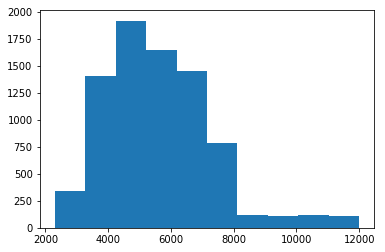

In [110]:
plt.hist(T_effs)

In [45]:
h5file.close()

AttributeError: 'Table' object has no attribute 'colpathnames'